<a href="https://colab.research.google.com/github/baker371/k8-data-visualization/blob/lwasampijja-baker/upwork-devs/lwasampijja-baker/All_Progress_Issues.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Table Showing All Open Issues

In [1]:
#@title

import requests
import json
import os
import numpy as np
import pandas as pd 
from pandas import json_normalize
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt 
import datetime
%load_ext google.colab.data_table

from google.colab import drive
drive.mount('/content/drive')

!cp "/content/drive/My Drive/models/issues.py" .

from issues import *

repos = [('k8-reverse-proxy',  								              '290214259'),
         ('k8-traffic-generator', 							            '289655404'),
         ('k8-glasswall-rebuild', 							            '287293218'),
         ('k8-data-visualization', 							            '289667349'),
         ('k8-performance-use-cases', 					            '290273552'),
         ('rebuild-k8s-filetypedetection', 			            '287291663'),
         ('service-monitor' ,								                '296541672'),
         ('p-k8-jmeter-test-engine',						            '298066012'),
         ('Open-Source',										                '288977992'),
         ('aws-jmeter-test-engine-v1',					            '298066702'),
         ('p-ui-wireframes',									              '294068904'),
         ('s-k8-releases',									                '293793703'),
         ('k8-test-data',									                  '291734345'),
         ('s-k8-proxy-rebuild',								              '296025969'),
         ('s-k8-buildpipeline',								              '297632322'),
         ('icap-poc-load-balancer',							            '301636842'),
         ('s-k8-core-images',								                '296093563'),
         ('threat-intelligence-reporting',			            '294125327'),
         ('chrome-extension',								                '294478400'),
         ('k8-website-mass-file-download',   		            '294746231'),
         ('p1-stakeholder-requests',						            '298535657'),
         ('s-gov-uk-prod',									                '295207627'),
         ('k8-website-mass-file-download-analysis',			    '294658450'),
         ('p-k8-tech-radar',									              '298542427'),
         ('k8-proxy-desktop',								                '292545304'),
         ('s-k8-templates',									                '295492627'),
         ('p2-p-graphs-visualisation',						          '297958812'),
         ('p-k8-kubernetes-10k-pods',					              '297944842'),
         ('p-k8-knative',									                  '297635485'),
         ('k8-proxy-marketing',								              '294890339'),
         ('p-design-requests',								              '295657273'),
         ('k8-website-mass-file-download-list-metadata',		'294747848'),
         ('k8-slack-bot',								                  	'293076768'),
         ('k8-website-mass-file-download-analysis-report',	'294747052'),
         ('k8-wardley-maps',									              '294663591')]

issues = Issues(repos)

dfn = issues.get_df()

dfs                   = []
for repo in repos:
  jtoken              = os.getenv('dtollaku', '')
  headers             = {'Authorization': f'token {jtoken}'}
  url                 = f'https://api.github.com/repositories/{repo[1]}/issues'

  res                 = requests.get(url, headers=headers, params={'state': 'open'}).json()
  data                = json_normalize(res, max_level=1)
  temp_df             = pd.DataFrame(data)
  temp_df['repo']     = repo[0]
  dfs.append(temp_df)

df                    = pd.concat(dfs, ignore_index=True)
df['created_at']      = pd.to_datetime(df['created_at']).dt.date
df['Aging Days']      = datetime.datetime.now().date() - df['created_at'] 
df                    = df[['repo','title','assignee.login', 'created_at', 'Aging Days']]
df = df.rename({'repo':'Project', 'title':'Issue Title', 'assignee.login':'Assignees', 'created_at':'Date Created'}, axis=1)

df


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Project,Issue Title,Assignees,Date Created,Aging Days
0,k8-reverse-proxy,k8 Image Requirements,NaN,2020-10-06,2 days
1,k8-reverse-proxy,Implement the reverse proxy for https://glasswallsolutions.com,svf97,2020-09-29,9 days
2,k8-reverse-proxy,Implement the reverse proxy for https://file-drop.co.uk,naderaly,2020-09-25,13 days
3,k8-reverse-proxy,Target CentOS 8,Abby595,2020-09-22,16 days
4,k8-reverse-proxy,Move c-icap submodule to stable-src/,NourEddineX,2020-09-21,17 days
5,k8-reverse-proxy,Programmatically discover embedded URLs of interest,NaN,2020-09-10,28 days
6,k8-reverse-proxy,Gov.uk-Some downloaded link files are not protected,NaN,2020-09-10,28 days
7,k8-reverse-proxy,deceptive site workaround,NaN,2020-09-09,29 days
8,k8-reverse-proxy,Create reference implementation,NaN,2020-09-02,36 days
9,k8-reverse-proxy,Create diagram for Reverse proxy project,mahnouman,2020-08-31,38 days


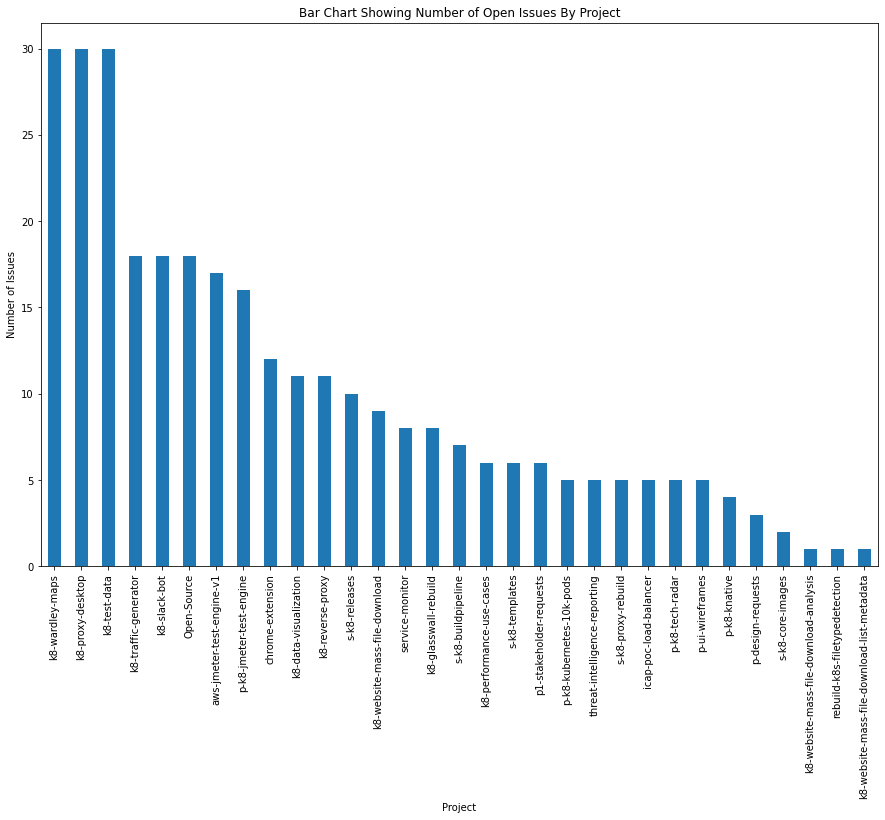

In [2]:
#@title
plt.figure(figsize=(15,10))
df["Project"].value_counts().plot.bar(title="Bar Chart Showing Number of Open Issues By Project")
plt.ylabel('Number of Issues')
plt.xlabel('Project')
plt.show()

#### A Table Showing issues assigned to a person across multiple repos and Export to Excel

In [3]:
  #@title 

project_filter = [" "] #@param {type:"raw"}

assignee_filter = ["baker371"] #@param {type:"raw"}


In [4]:
#@title
filter1 = df["Project"].isin(project_filter) 
filter2 = df["Assignees"].isin(assignee_filter) 
df[filter1 | filter2]

,Project,Issue Title,Assignees,Date Created,Aging Days
46,k8-data-visualization,Apply Text2Code for Jupyter notebook - Lwasampijja,baker371,2020-09-14,24 days
134,k8-test-data,Refactor Rabbit MQ Handler to have K8 end point and provide complete abstraction,baker371,2020-10-07,1 days
140,k8-test-data,Log processor using ELK.,baker371,2020-09-23,15 days


#### Export to Excel

In [5]:
#@title
df.to_csv('report.csv')

#### Open Issues per Assignee

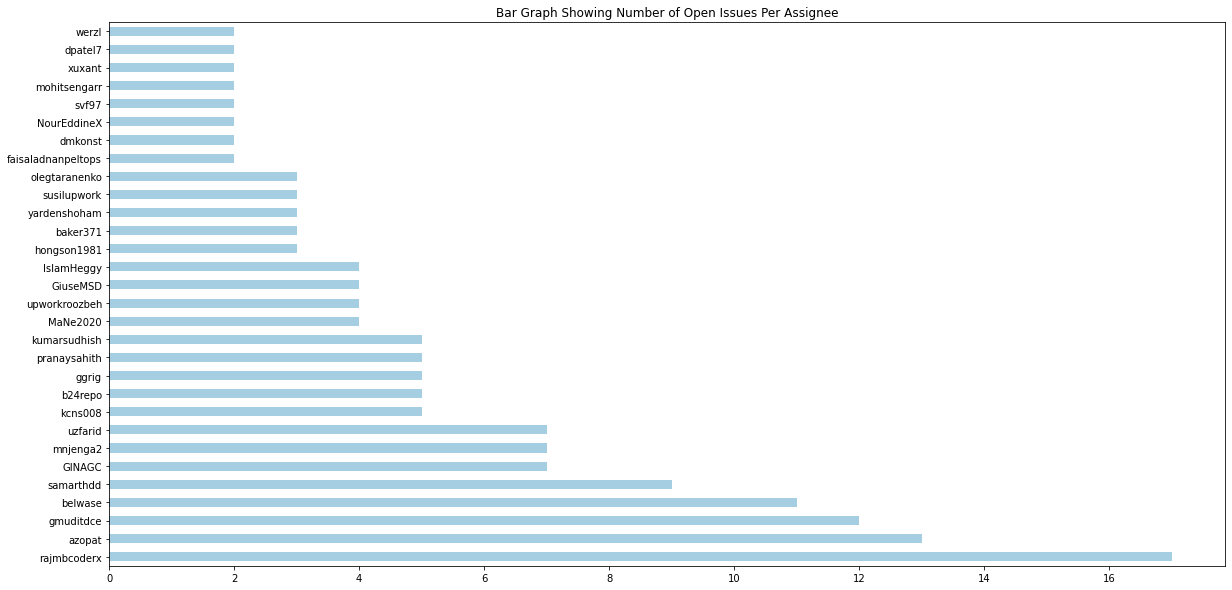

In [6]:
#@title

df['Assignees'].value_counts().head(30).plot(kind='barh', colormap='Paired', figsize=(20,10), title="Bar Graph Showing Number of Open Issues Per Assignee")
        

#### Visualising Zenhub Pipelines Per Repos



In [7]:
#@title
issues.show_tabular_report_by_repo()

pipeline,,Backlog,In Progress,New Issues,Peer Review
repo,,,,,
Open-Source,24,0,2,3,1
aws-jmeter-test-engine-v1,30,0,0,0,0
chrome-extension,7,0,5,4,3
icap-poc-load-balancer,5,0,0,0,0
k8-data-visualization,24,2,3,0,1
k8-glasswall-rebuild,23,0,1,3,3
k8-performance-use-cases,17,1,1,2,2
k8-proxy-desktop,8,4,4,11,3
k8-proxy-marketing,5,0,0,0,0


#### Visualising Zenhub Pipelines Per User

In [8]:
#@title
issues.show_tabular_report_by_user()

pipeline,,Backlog,In Progress,New Issues,Peer Review
assignee.login,,,,,
Abby595,0,0,0,1,0
DGBREW,2,0,0,1,0
DinisCruz,2,0,0,0,0
GINAGC,0,0,0,2,0
GiuseMSD,4,0,0,2,1
IslamHeggy,9,2,1,0,0
JOSHUAJEBARAJ,2,0,0,0,0
M-Ayman,0,0,0,0,1
MaNe2020,3,0,0,3,1
